In [1]:
import skimage
from skimage import data

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [21]:
import warnings
warnings.filterwarnings("ignore")

## Read the image

In [2]:
bird = mpimg.imread("datasets/images/bird.jpeg")

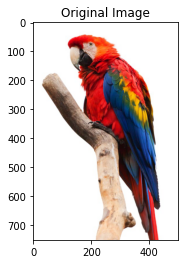

In [3]:
plt.title("Original Image")
plt.imshow(bird)

In [4]:
bird.shape

(750, 500, 3)

In [5]:
bird[200:250, 200:250]

array([[[157,   9,   9],
        [178,  25,  28],
        [186,  30,  34],
        ...,
        [ 58,  90, 167],
        [ 45,  84, 151],
        [ 57, 102, 157]],

       [[148,   6,   5],
        [164,  18,  21],
        [170,  21,  27],
        ...,
        [ 68,  91, 171],
        [ 51,  84, 153],
        [ 61, 101, 160]],

       [[139,   3,   5],
        [150,   9,  15],
        [152,   9,  15],
        ...,
        [ 71,  88, 170],
        [ 56,  85, 155],
        [ 63, 103, 165]],

       ...,

       [[197,  26,  16],
        [209,  28,  21],
        [215,  26,  24],
        ...,
        [ 35,  53, 125],
        [ 49,  42, 119],
        [ 41,  48, 116]],

       [[199,  27,  17],
        [213,  30,  26],
        [220,  32,  30],
        ...,
        [ 31,  49, 121],
        [ 45,  38, 115],
        [ 34,  43, 108]],

       [[199,  27,  17],
        [210,  28,  24],
        [215,  31,  29],
        ...,
        [ 33,  52, 121],
        [ 41,  41, 113],
        [ 31,  45, 108]]

In [6]:
bird_reshape = bird.reshape(bird.shape[0], -1)    # reshaped the width and channel value

bird_reshape.shape

(750, 1500)

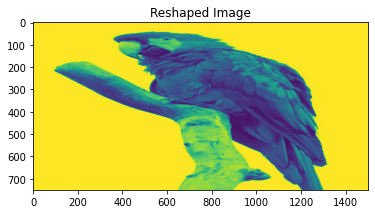

In [8]:
plt.figure(figsize= (6, 6))
plt.title("Reshaped Image")
plt.imshow(bird_reshape)

In [11]:
# resize the image

import skimage.transform

bird_resized = skimage.transform.resize(bird, (500, 500))

bird_resized.shape

(500, 500, 3)

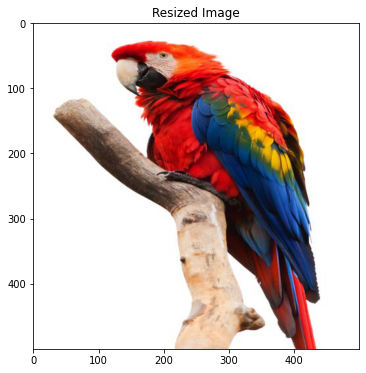

In [12]:
plt.figure(figsize= (6, 6))
plt.title("Resized Image")
plt.imshow(bird_resized)

In [13]:
aspect_ratio_original = bird.shape[1] / float(bird.shape[0])
aspect_ratio_resized = bird_resized.shape[1] / float(bird_resized.shape[0])

print("Original aspect ratio: ", aspect_ratio_original)
print("Resized aspect ratio: ", aspect_ratio_resized)

Original aspect ratio:  0.6666666666666666
Resized aspect ratio:  1.0


In [22]:
# Rescale the image

# Separate scale factors can be defined as (row_scale, col_scale).
bird_rescaled = skimage.transform.rescale(bird_resized, (row_scale=1, col_scale=aspect_ratio_original))

bird_rescaled.shape

SyntaxError: invalid syntax (486079926.py, line 4)

TypeError: Invalid shape (333, 333, 2) for image data

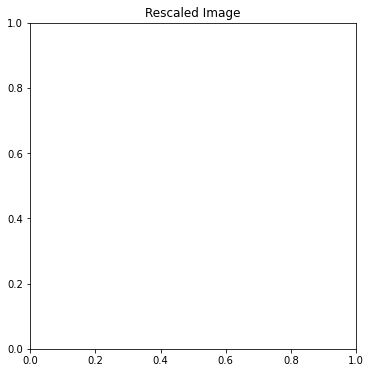

In [23]:
plt.figure(figsize= (6, 6))
plt.title("Rescaled Image")
plt.imshow(bird_rescaled)

In [24]:
aspect_ratio_rescaled = bird_rescaled.shape[1] / float(bird_rescaled.shape[0])

print("Rescaled aspect ratio: ", aspect_ratio_rescaled)

Rescaled aspect ratio:  1.0


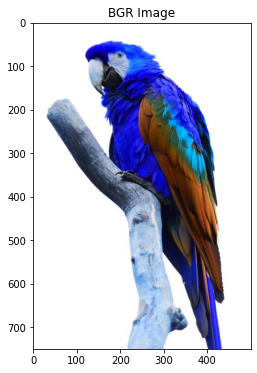

In [27]:
bird_BGR = bird[:, :, (2, 1, 0)]    # flipped the color-channel from RGB ---> BGR

plt.figure(figsize= (6, 6))
plt.title("BGR Image")
plt.imshow(bird_BGR)

In [28]:
bird_BGR.shape

(750, 500, 3)

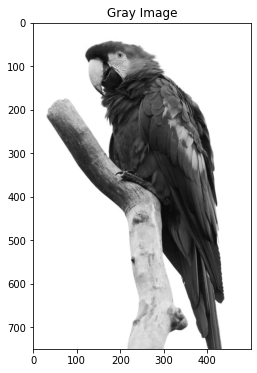

In [32]:
bird_gray = skimage.color.rgb2gray(bird)    # color image to gray image

plt.figure(figsize= (6, 6))
plt.title("Gray Image")
plt.imshow(bird_gray, cmap='gray')

In [33]:
bird_gray.shape

(750, 500)

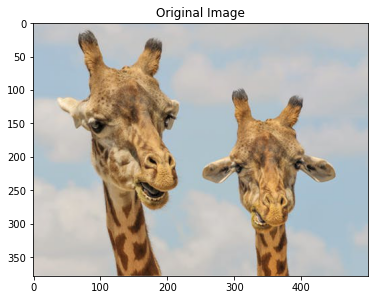

In [35]:
import skimage.io
giraffes = skimage.img_as_float(skimage.io.imread('datasets/images/giraffes.jpg')).astype(np.float32)

plt.figure(figsize= (6, 6))
plt.title("Original Image")
plt.imshow(giraffes)

In [36]:
giraffes.shape

(378, 500, 3)

In [42]:
def crop(image, cropx, cropy):
    # cropx: width of the cropped image
    # cropy: height of the cropped image
    y, x, c = image.shape
    
    startx = x // 2 - (cropx // 8)
    starty = y // 3 - (cropy // 4)
    
    stopx = startx + cropx
    stopy = starty + 2 * cropy
    
    return image[starty:stopy, startx:stopx]

In [43]:
giraffes_cropped = crop(giraffes, 256, 256)

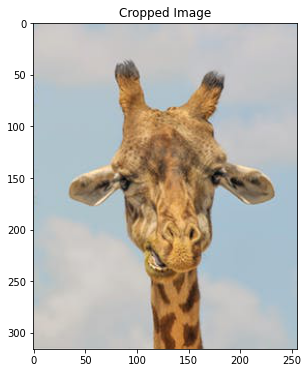

In [44]:
plt.figure(figsize= (6, 6))
plt.title("Cropped Image")
plt.imshow(giraffes_cropped)

In [45]:
from skimage.util import random_noise

In [46]:
sigma = 0.155
noisy_giraffes = random_noise(giraffes, var=sigma**2)

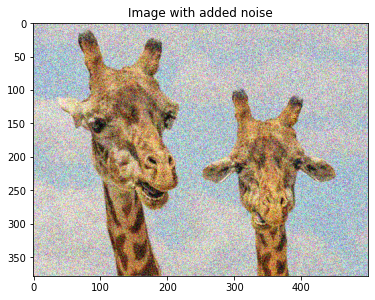

In [47]:
plt.figure(figsize= (6, 6))
plt.title("Image with added noise")
plt.imshow(noisy_giraffes)

In [48]:
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral, denoise_wavelet, estimate_sigma

In [49]:
sigma_est = estimate_sigma(noisy_giraffes,
                           multichannel=True,
                           average_sigmas=True) 

In [50]:
sigma_est

0.14782054002242714

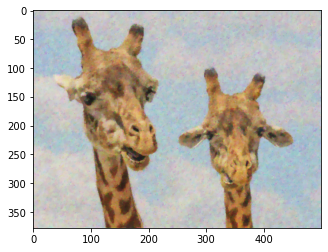

In [52]:
# This is total variation filter.
# Weight here refers to the denoising weight.
# The greater the weight, the more denoising that will occur 
# at the expense of fidelity to the input image.

plt.imshow(denoise_tv_chambolle(noisy_giraffes, 
                                weight=0.1, 
                                multichannel=True))

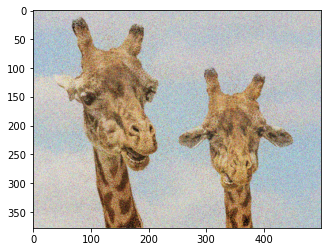

In [53]:
# Bilateral filter is an edge-preserving filter.
# It averages pixels based on how close they are spatially
# and how similar they are

plt.imshow(denoise_bilateral(noisy_giraffes, 
                             sigma_color=0.05, 
                             sigma_spatial=15, 
                             multichannel=True))

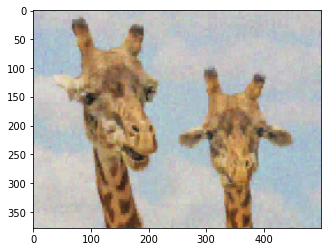

In [54]:
# This is the wavelet filter.
# this filter transforms the original image to another representation 
# in the wavelet domain before it performs denoising.

# Denoising image is a useful transformation to apply to your input data

plt.imshow(denoise_wavelet(noisy_giraffes, multichannel=True))

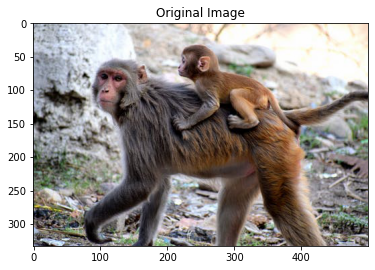

In [55]:
monkeys = skimage.img_as_float(skimage.io.imread('datasets/images/monkeys.jpeg')).astype(np.float32)

plt.figure(figsize= (6, 6))
plt.title("Original Image")
plt.imshow(monkeys)

In [56]:
# Flip the image around randomly

monkeys_flip = np.fliplr(monkeys)

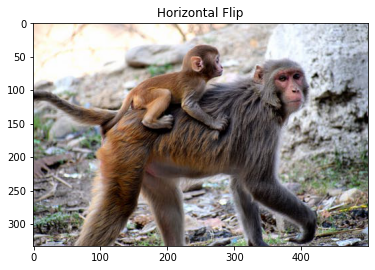

In [58]:
plt.figure(figsize= (6, 6))
plt.title("Horizontal Flip")
plt.imshow(monkeys_flip)

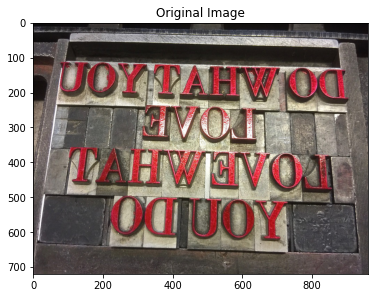

In [59]:
mirror = skimage.img_as_float(skimage.io.imread('datasets/images/book-mirrored.jpg')).astype(np.float32)

plt.figure(figsize= (6, 6))
plt.title("Original Image")
plt.imshow(mirror)

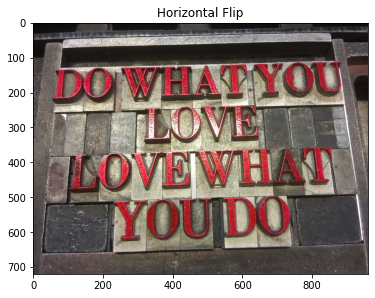

In [60]:
mirror_flip = np.fliplr(mirror)

plt.figure(figsize= (6, 6))
plt.title("Horizontal Flip")
plt.imshow(mirror_flip)